In [17]:
import sys
sys.path.append('..')
import h5py
import yaml
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../flowrec/utils/a4.mplstyle')

from pathlib import Path
from mpl_toolkits.axes_grid1 import ImageGrid

from flowrec.utils import my_discrete_cmap
from flowrec.losses import relative_error
grey = '#808080'

# Plot summary compare loss functions

In [2]:
results_dir = Path('../local_results/2dkol/repeat_clean_minimum')

p3 = re.compile('^3-')
pmean3 = re.compile('^mean3-')
pclassic = re.compile('^classic-')

def is_loss3(name):
    if re.search(p3, name):
        return True
    else:
        return False
def is_lossmean(name):
    if re.search(pmean3, name):
        return True
    else:
        return False
def is_lossclassic(name):
    if re.search(pclassic, name):
        return True
    else:
        return False

In [3]:
def read_summary_clean_all(d):

    with h5py.File(Path(d,'summary.h5')) as hf:
        names = np.array(hf.get('runs_name')).astype('unicode')
        l_train = np.array(hf.get('runs_loss_train'))

    loss_total_loss3 = []
    loss_rel_loss3 = []
    name_loss3 = []
    loss_total_mean3 = []
    loss_rel_mean3 = []
    name_mean3 = []
    loss_total_classic = []
    loss_rel_classic = []
    name_classic = []
    for i in range(len(names)):
        if is_loss3(names[i]):
            name_loss3.append(names[i])
            loss_total_loss3.append(np.sum(l_train[i,1:]))
            loss_rel_loss3.append(l_train[i,0])
        if is_lossmean(names[i]):
            name_mean3.append(names[i])
            loss_total_mean3.append(np.sum(l_train[i,1:]))
            loss_rel_mean3.append(l_train[i,0])
        if is_lossclassic(names[i]):
            name_classic.append(names[i])
            loss_total_classic.append(np.sum(l_train[i,1:]))
            loss_rel_classic.append(l_train[i,0])

    loss_total_loss3 = np.array(loss_total_loss3)
    loss_rel_loss3 = np.array(loss_rel_loss3)
    _sort_idx = np.argsort(loss_total_loss3)
    loss_total_loss3 = loss_total_loss3[_sort_idx]
    loss_rel_loss3 = loss_rel_loss3[_sort_idx]
    print('Best run sorted by total loss is ', name_loss3[_sort_idx[0]])
    print('Best run sorted by relative loss is ', name_loss3[np.argsort(loss_rel_loss3)[0]])


    loss_total_mean3 = np.array(loss_total_mean3)
    loss_rel_mean3 = np.array(loss_rel_mean3)
    _sort_idx = np.argsort(loss_total_mean3)
    loss_total_mean3 = loss_total_mean3[_sort_idx]
    loss_rel_mean3 = loss_rel_mean3[_sort_idx]
    print('Best run sorted by total loss is ', name_mean3[_sort_idx[0]])
    print('Best run sorted by relative loss is ', name_mean3[np.argsort(loss_rel_mean3)[0]])

    loss_total_classic = np.array(loss_total_classic)
    loss_rel_classic = np.array(loss_rel_classic)
    _sort_idx = np.argsort(loss_total_classic)
    loss_total_classic = loss_total_classic[_sort_idx]
    loss_rel_classic = loss_rel_classic[_sort_idx]
    print('Best run sorted by total loss is ', name_classic[_sort_idx[0]])
    print('Best run sorted by relative loss is ', name_classic[np.argsort(loss_rel_classic)[0]])

    summary_loss3 = {
        'loss_total': loss_total_loss3,
        'loss_rel': loss_rel_loss3
    }
    summary_mean3 = {
        'loss_total': loss_total_mean3,
        'loss_rel': loss_rel_mean3
    }
    summary_classic = {
        'loss_total': loss_total_classic,
        'loss_rel': loss_rel_classic
    }

    return summary_loss3, summary_mean3, summary_classic

In [4]:
summary_loss3, summary_mean3, summary_classic = read_summary_clean_all(results_dir)

Best run sorted by total loss is  3-224-18
Best run sorted by relative loss is  3-179-54981
Best run sorted by total loss is  mean3-72821-4625
Best run sorted by relative loss is  mean3-224-18
Best run sorted by total loss is  classic-224-18
Best run sorted by relative loss is  classic-72821-4625


In [5]:
clean_example_setup = '224-18'

In [6]:
total_mean_loss3 = np.mean(summary_loss3['loss_total'])
rel_mean_loss3 = np.mean(summary_loss3['loss_rel'])
rel_std_loss3 = np.std(summary_loss3['loss_rel'])
total_mean_mean3 = np.mean(summary_mean3['loss_total'])
rel_mean_mean3 = np.mean(summary_mean3['loss_rel'])
rel_std_mean3 = np.std(summary_mean3['loss_rel'])
total_mean_classic = np.mean(summary_classic['loss_total'])
rel_mean_classic = np.mean(summary_classic['loss_rel'])
rel_std_classic = np.std(summary_classic['loss_rel'])

print(f'Loss3: {rel_mean_loss3:.4f}+-{rel_std_loss3:.4f}')
print(f'Mean3: {rel_mean_mean3:.4f}+-{rel_std_mean3:.4f}')
print(f'Classic: {rel_mean_classic:.4f}+-{rel_std_classic:.4f}')

Loss3: 0.0551+-0.0034
Mean3: 0.0738+-0.0033
Classic: 0.0719+-0.0073


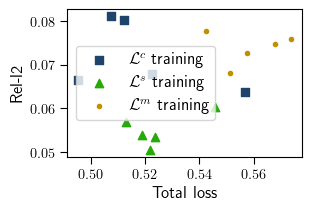

In [7]:
fig, ax = plt.subplots(1,1,sharey=True, figsize=(3,2))

ax.scatter(summary_classic['loss_total'], summary_classic['loss_rel'], label='$\mathcal{L}^c$ training',marker='s', color=my_discrete_cmap(0))
ax.scatter(summary_loss3['loss_total'], summary_loss3['loss_rel'], label='$\mathcal{L}^s$ training',marker='^', color=my_discrete_cmap(1))
ax.scatter(summary_mean3['loss_total'], summary_mean3['loss_rel'], label='$\mathcal{L}^m$ training',marker='.', color=my_discrete_cmap(2))
plt.legend()
ax.set_xlabel('Total loss')
ax.set_ylabel('Rel-l2')

plt.show()

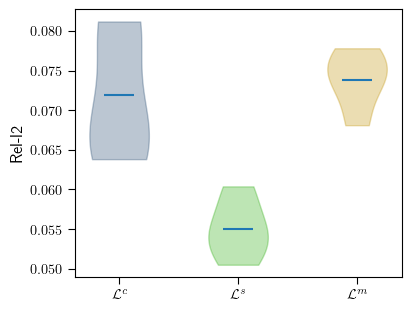

In [8]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
violin_parts = ax.violinplot([summary_classic['loss_rel'],summary_loss3['loss_rel'],summary_mean3['loss_rel']],showmeans=True,showextrema=False)
ax.set_xticks([1,2,3],['$\mathcal{L}^c$','$\mathcal{L}^s$','$\mathcal{L}^m$'])
ax.set_ylabel('Rel-l2')
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_color(my_discrete_cmap(i))
    # pc.set_edgecolor(my_discrete_cmap(i))

# Results of cases

In [9]:
from flowrec.sensors import griddata_periodic
import jax.numpy as jnp

def interpolate(insert_observation_fn, sensor_locs, data_shape, observed):

    sensors_loc_x, sensors_loc_y = sensor_locs

    compare_interp = []
    nt = data_shape[0]
    ndim = data_shape[-1]

    side_length = data_shape[1]
    g1,g2 = np.mgrid[-side_length:side_length*2, -side_length:side_length*2]
    
    temp_observed = np.empty(data_shape)
    temp_observed.fill(np.nan) #this is noisy
    temp_observed = insert_observation_fn(jnp.asarray(temp_observed),jnp.asarray(observed)) # observed_test is noisy if

    for i in range(ndim):
        _locs = np.stack((sensors_loc_x[i].flatten(),sensors_loc_y[i].flatten()),axis=1)
        for t in range(nt):
            _interp = griddata_periodic(_locs,temp_observed[t,...,i][~np.isnan(temp_observed[t,...,i])],(g1,g2),'cubic',side_length)
            compare_interp.append(_interp[side_length:2*side_length,side_length:2*side_length])

    compare_interp = np.array(compare_interp)
    if ndim > 1:
        compare_interp = np.stack((compare_interp[:nt,...],compare_interp[nt:2*nt,...],compare_interp[2*nt:3*nt,...]),axis=-1)

    return compare_interp, temp_observed

In [10]:
def get_sensor_locs(example_train, take_observation_fn, insert_observation_fn):

    sensors_empty = np.empty_like(example_train[[0],...])
    sensors_empty.fill(np.nan)
    grid_x, grid_y = np.mgrid[0:example_train.shape[1], 0:example_train.shape[2]]

    gridx1 = np.repeat(grid_x[None,:,:,None],3,axis=3)
    gridy1 = np.repeat(grid_y[None,:,:,None],3,axis=3)

    idx_x = take_observation_fn(gridx1)
    idx_y = take_observation_fn(gridy1)

    idx_x = insert_observation_fn(jnp.asarray(sensors_empty),jnp.asarray(idx_x))[0,...]
    sensors_loc_x = []
    for i in range(idx_x.shape[-1]):
        sensors_loc_x.append(idx_x[...,i][~np.isnan(idx_x[...,i])].astype(int))

    idx_y = insert_observation_fn(jnp.asarray(sensors_empty),jnp.asarray(idx_y))[0,...]
    sensors_loc_y = []
    for i in range(idx_y.shape[-1]):
        sensors_loc_y.append(idx_y[...,i][~np.isnan(idx_y[...,i])].astype(int))
    
    return [sensors_loc_x, sensors_loc_y]

In [11]:
import jax
import flowrec.training_and_states as state_utils
import flowrec.data as data_utils
def get_summary_onecase(d, predict_only=False):

    with open(Path(d,'config.yml'), 'r') as f:
        cfg = yaml.load(f, Loader=yaml.UnsafeLoader)
    cfg.data_config.update({'data_dir':'.'+cfg.data_config.data_dir})
    datacfg = cfg.data_config
    mdlcfg = cfg.model_config
    traincfg = cfg.train_config

    print('Loading data')
    data, datainfo = cfg.case.dataloader(datacfg)

    _keys_to_exclude = [
        'u_train_clean',
        'u_val_clean',
        'train_minmax',
        'val_minmax',
        'u_train',
        'u_val',
        'inn_train',
        'inn_val'
    ]
    observe_kwargs = {key: value for key, value in data.items() if key not in _keys_to_exclude}
    print('Building observation functions')
    take_observation, insert_observation = cfg.case.observe(
        datacfg,
        example_pred_snapshot = data['u_train'][0,...],
        example_pin_snapshot = data['inn_train'][0,...],
        **observe_kwargs
    )
    observed_train, train_minmax = take_observation(data['u_train'], init=True)
    observed_val, val_minmax = take_observation(data['u_val'], init=True)
    data.update({
        'y_train':observed_train, # not normalised
        'y_val':observed_val, # not normalised
        'train_minmax':train_minmax,
        'val_minmax':val_minmax 
    })
    print('Building model')
    prep_data, make_model = cfg.case.select_model(datacfg = datacfg, mdlcfg = mdlcfg, traincfg = traincfg)
    data = prep_data(data, datainfo)
    mdl = make_model(mdlcfg)
    state = state_utils.restore_trainingstate(d,'state')
    inn_train = data['inn_train']
    if datacfg.snr:
        yfull_train_clean = data['u_train_clean']
    else:
        yfull_train_clean = data['u_train']

    print('Predicting')
    pred_train = []
    _t = 0
    while _t < inn_train.shape[0]:
        if (_t + 500) < inn_train.shape[0]:
            pred_train.append(
                mdl.predict(state.params, inn_train[_t:_t+500,:])
            )
        else:
            pred_train.append(
                mdl.predict(state.params, inn_train[_t:,:])
            )
        _t = _t + 500

    pred_train = np.concatenate(pred_train, axis=0)

    if cfg.data_config.normalise:
        pred_train = data_utils.unnormalise_group(pred_train, train_minmax, axis_data=-1, axis_range=0)

    if predict_only:
        return pred_train
    else:
        sensor_locs = get_sensor_locs(yfull_train_clean[:5,...], take_observation, insert_observation)

        print('Interpolating from observations')
        u_interp, observed = interpolate(insert_observation, sensor_locs, yfull_train_clean.shape, observed_train)
    
        # return (clean, noisy, interp, predicted)
        return (yfull_train_clean, data['u_train'], u_interp, pred_train), datainfo, observed

In [12]:
def get_tke(ufluc, datainfo):

    k = np.fft.fftfreq(128,d=datainfo.dx)
    dk = k[3]-k[2]
    k = np.fft.fftfreq(128,d=1/128)
    kgrid1,kgrid2 = np.meshgrid(k,k)
    kgrid_magnitude = np.sqrt((kgrid1**2)+(kgrid2**2))
    kgrid_magnitude_int = kgrid_magnitude.astype('int')
    kmax = np.max(kgrid_magnitude_int)
    kbins = np.arange(kmax).astype('int')


    u_fft = np.fft.fft2(ufluc[...,:2],axes=[1,2])
    ke_fft = np.sum(u_fft * np.conj(u_fft),axis=-1).real * 0.5
    ke_avg = np.mean(ke_fft,axis=0)
    spectrum = np.zeros_like(kbins).astype('float32')
    for i in kbins:
        spectrum[i] += 0.5*np.sum(ke_avg[kgrid_magnitude_int==i])
    
    return spectrum, kbins, dk

# Plot best case

In [43]:
results_loss3, datainfo, observed = get_summary_onecase(Path(results_dir,'3-'+clean_example_setup))

In [23]:
def make_image_snapshots_clean(data, figname, t1):

    ref = data[0]
    interp = data[2]
    pred = data[3]
    fig = plt.figure(figsize=(7,4))
    grid_1 = ImageGrid(fig, (0.04,0,0.54,0.3), (1,3),cbar_mode='single', share_all=True)
    grid_2 = ImageGrid(fig, (0.04,0.31,0.54,0.3), (1,3),cbar_mode='single', share_all=True)
    grid_3 = ImageGrid(fig, (0.04,0.62,0.54,0.3), (1,3),cbar_mode='single', share_all=True)

    grid_r1 = ImageGrid(fig, (0.64,0,0.36,0.3), (1,2), cbar_mode='single', share_all=True)
    grid_r2 = ImageGrid(fig, (0.64,0.31,0.36,0.3), (1,2), cbar_mode='single', share_all=True)
    grid_r3 = ImageGrid(fig, (0.64,0.62,0.36,0.3), (1,2), cbar_mode='single', share_all=True)

    for i, grid in enumerate([grid_3,grid_2,grid_1]):
        axes = grid.axes_all
        im_ref = axes[0].imshow(ref[t1,...,i].T)
        im_interp = axes[1].imshow(interp[t1,...,i].T)
        im_pred = axes[2].imshow(pred[t1,...,i].T)
        # vmin = []
        # vmax = []
        # for im in [im_ref,im_interp,im_pred]:
        #     clims = im.get_clim()
        #     vmin.append(clims[0])
        #     vmax.append(clims[1])
        for im in [im_ref,im_interp,im_pred]:
            # im.set_clim(min(vmin),max(vmax))
            im.set_clim(im_ref.get_clim()[0],im_ref.get_clim()[1])
        grid.cbar_axes[0].colorbar(im_ref)
        grid.axes_all[0].set(xticks=[],yticks=[])

    for i, grid in enumerate([grid_r3,grid_r2,grid_r1]):
        imerr_interp = grid.axes_all[0].imshow(np.abs(ref[t1,...,i]-interp[t1,...,i]))
        imerr_pred = grid.axes_all[1].imshow(np.abs(ref[t1,...,i]-pred[t1,...,i]))
        for im in [imerr_interp, imerr_pred]:
            im.set_clim(imerr_interp.get_clim()[0],imerr_interp.get_clim()[1])
        grid.cbar_axes[0].colorbar(imerr_interp)
        grid.axes_all[0].set(xticks=[],yticks=[])
    fig.text(0,0.15,'$p$')
    fig.text(0,0.48,'$u_2$')
    fig.text(0,0.81,'$u_1$')
    fig.text(0.09,0.97,'Reference')
    fig.text(0.25,0.97,'Interpolated')
    fig.text(0.44,0.97,'Reconstructed')
    fig.text(0.75,0.99,'Absolute error')
    fig.text(0.66,0.93,'Interpolated')
    fig.text(0.84,0.93,'Reconstructed')
    # plt.savefig('./figs/'+figname,bbox_inches='tight')

/home/ym917/anaconda3/envs/fr/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/home/ym917/anaconda3/envs/fr/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


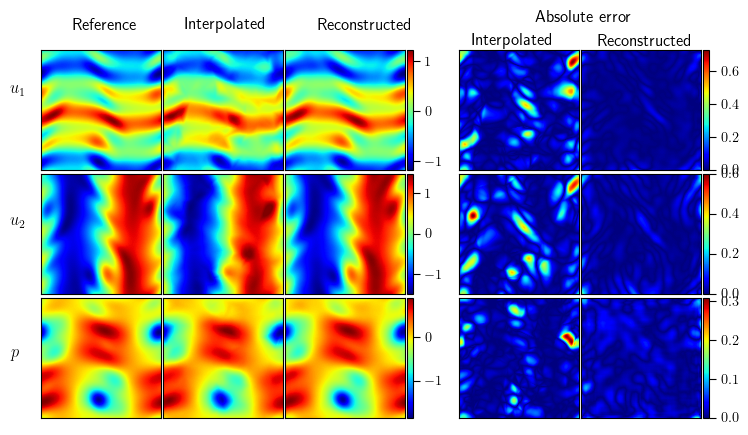

In [56]:
make_image_snapshots_clean(results_loss3, None, 17)

In [65]:
spectrum_pred, kbins, dk = get_tke(results_loss3[3], datainfo)
spectrum_ref, _, _ = get_tke(results_loss3[0], datainfo)
spectrum_interp, _, _= get_tke(results_loss3[2], datainfo)

/tmp/ipykernel_6521/2403490426.py:28: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


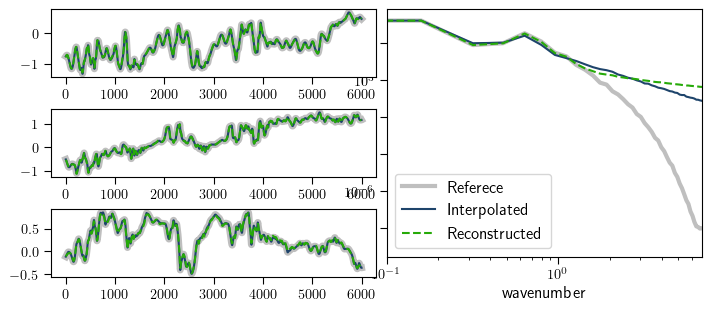

In [98]:
probe = [15,39]

fig = plt.figure(figsize=(7,3))
ax1 = fig.add_subplot(122, anchor=(0.7,0.0))
# fig, (ax0, ax1) = plt.subplots(1,2,figsize=(7,3))
ax1.plot(kbins*dk, spectrum_ref, label='Referece', color=grey, alpha=0.5, linewidth=3)
ax1.plot(kbins*dk, spectrum_interp, label='Interpolated', color=my_discrete_cmap(0))
ax1.plot(kbins*dk, spectrum_pred, label='Reconstructed', color=my_discrete_cmap(1),linestyle='--')
ax1.set(yscale='log', xscale='log', xlabel='wavenumber', ylabel='TKE')
ax1.set_xlim([0.1,6.84])
ax1.legend()

ax01 = fig.add_subplot(321)
ax01.plot(results_loss3[0][:,probe[0],probe[0],0],color=grey,alpha=0.5,linewidth=5)
ax01.plot(results_loss3[2][:,probe[0],probe[0],0],color=my_discrete_cmap(0))
ax01.plot(results_loss3[3][:,probe[0],probe[0],0],color=my_discrete_cmap(1),linestyle='--')

ax02 = fig.add_subplot(323)
ax02.plot(results_loss3[0][:,probe[0],probe[0],1],color=grey,alpha=0.5,linewidth=5)
ax02.plot(results_loss3[2][:,probe[0],probe[0],1],color=my_discrete_cmap(0))
ax02.plot(results_loss3[3][:,probe[0],probe[0],1],color=my_discrete_cmap(1),linestyle='--')

ax03 = fig.add_subplot(325)
ax03.plot(results_loss3[0][:,probe[0],probe[0],2],color=grey,alpha=0.5,linewidth=5)
ax03.plot(results_loss3[2][:,probe[0],probe[0],2],color=my_discrete_cmap(0))
ax03.plot(results_loss3[3][:,probe[0],probe[0],2],color=my_discrete_cmap(1),linestyle='--')

fig.tight_layout()
plt.show()

# Noisy cases

In [13]:
def make_image_snapshots(data, figname, t1):
    # data is (ref, noisy, interp, classic, loss3, mean3)

    ref = data[0]

    fig = plt.figure(figsize=(7,7))
    
    # grids for mean
    grid_b1 = ImageGrid(fig, (0.08,0.00,0.92,0.14), (1,6),cbar_mode='single', share_all=True)
    grid_b2 = ImageGrid(fig, (0.08,0.15,0.92,0.14), (1,6),cbar_mode='single', share_all=True)
    grid_b3 = ImageGrid(fig, (0.08,0.30,0.92,0.14), (1,6),cbar_mode='single', share_all=True)
    
    # grids for snapshots
    grid_t1 = ImageGrid(fig, (0.08,0.50,0.92,0.14), (1,6),cbar_mode='single', share_all=True)
    grid_t2 = ImageGrid(fig, (0.08,0.65,0.92,0.14), (1,6),cbar_mode='single', share_all=True)
    grid_t3 = ImageGrid(fig, (0.08,0.80,0.92,0.14), (1,6),cbar_mode='single', share_all=True)
    
    # snapshots
    for i, grid in enumerate([grid_t3,grid_t2,grid_t1]):
        axes = grid.axes_all
        im_ref = axes[0].imshow(ref[t1,...,i])
        
        for j in range(1,6):
            im = axes[j].imshow(data[j][t1,...,i])
            im.set_clim(im_ref.get_clim()[0],im_ref.get_clim()[1])
        grid.cbar_axes[0].colorbar(im_ref)
        grid.axes_all[0].set(xticks=[],yticks=[])
    
    # mean
    for i, grid in enumerate([grid_b3,grid_b2,grid_b1]):
        axes = grid.axes_all
        im_ref = axes[0].imshow(np.mean(ref[...,i],axis=0))
        
        for j in range(1,6):
            im = axes[j].imshow(np.mean(data[j][...,i],axis=0))
            im.set_clim(im_ref.get_clim()[0],im_ref.get_clim()[1])
        grid.cbar_axes[0].colorbar(im_ref)
        grid.axes_all[0].set(xticks=[],yticks=[])
    
    
    fig.text(0.11,0.98,'Reference')
    fig.text(0.28,0.98,'Noisy')
    fig.text(0.41,0.98,'Interpolated')
    fig.text(0.60,0.98,'$\mathcal{L}^c$')
    fig.text(0.75,0.98,'$\mathcal{L}^s$')
    fig.text(0.9,0.98,'$\mathcal{L}^m$')
    fig.text(0.01,0.20,'Mean',rotation='vertical')
    fig.text(0.05,0.07, '$\overline{p}$')
    fig.text(0.05,0.22, '$\overline{u}_2$')
    fig.text(0.05,0.37, '$\overline{u}_1$')
    fig.text(0.01,0.70,f't={t1}',rotation='vertical')
    fig.text(0.05,0.57, '$p$')
    fig.text(0.05,0.72, '$u_2$')
    fig.text(0.05,0.87, '$u_1$')

    # plt.savefig('./figs/'+figname,bbox_inches='tight')

## SNR10

In [ ]:
results10, datainfo, observed = get_summary_onecase(Path('../local_results/2dkol/sweep_noisy/snr10_classic/expert-sweep-5'))
_results10_loss3 = get_summary_onecase(Path('../local_results/2dkol/sweep_noisy/snr10_loss3/cool-sweep-4'), predict_only=True)
_results10_mean3 = get_summary_onecase(Path('../local_results/2dkol/sweep_noisy/snr10_mean3/glad-sweep-4'), predict_only=True)
results10 = list(results10)
results10.append(_results10_loss3)
results10.append(_results10_mean3)

/home/ym917/anaconda3/envs/fr/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)


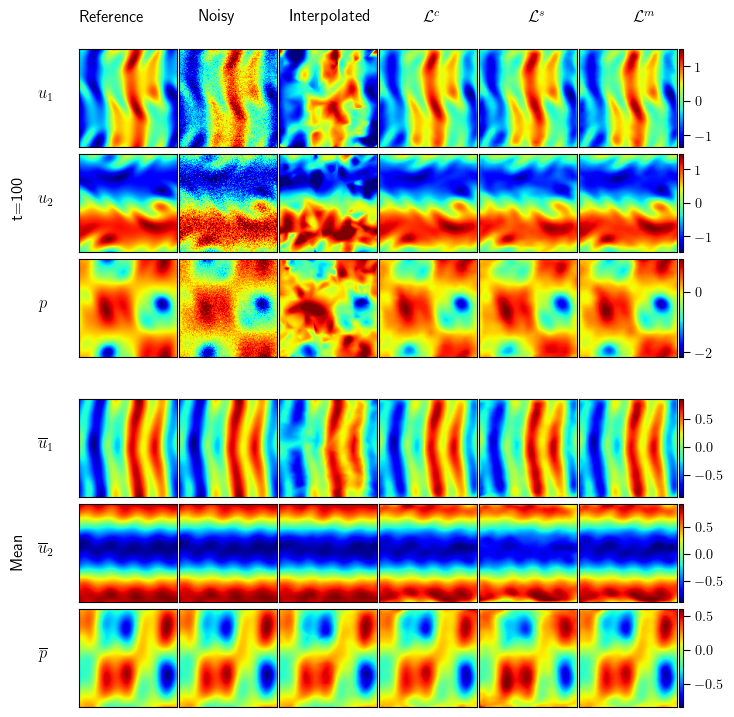

In [25]:
make_image_snapshots(results10,None,100)

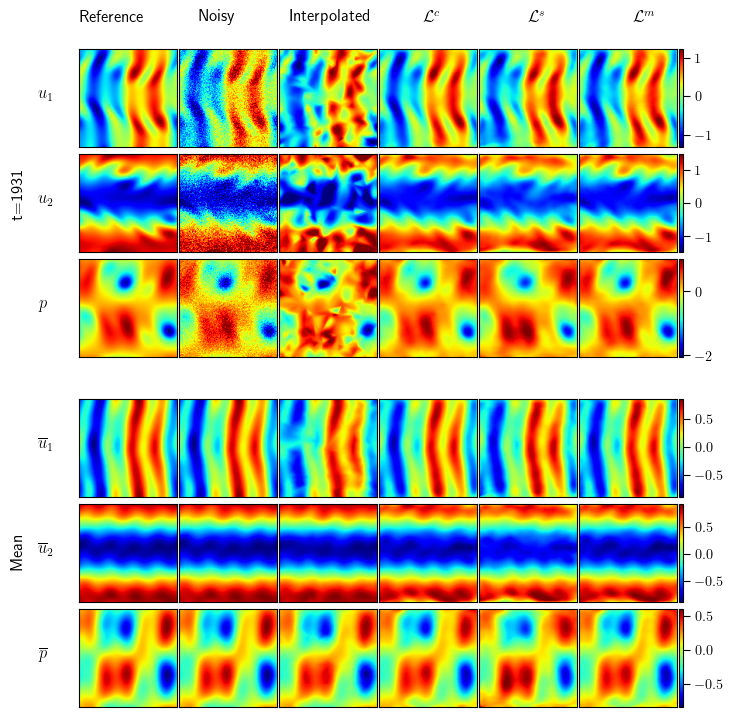

In [26]:
make_image_snapshots(results10,None,1931)

In [14]:
results5, datainfo, observed = get_summary_onecase(Path('../local_results/2dkol/sweep_noisy/snr5_classic/tough-sweep-8'))
_results5_loss3 = get_summary_onecase(Path('../local_results/2dkol/sweep_noisy/snr5_loss3/sandy-sweep-2'), predict_only=True)
_results5_mean3 = get_summary_onecase(Path('../local_results/2dkol/sweep_noisy/snr5_mean3/rich-sweep-9'), predict_only=True)
results5 = list(results5)
results5.append(_results5_loss3)
results5.append(_results5_mean3)

Loading data


/home/ym917/Documents/Codes/FlowReconstructionFromExperiment/figures_for_paper/../train_config/train_options/dataloader.py:228: UserWarning: Unknown command line flag '_noisy'
  warnings.warn(str(e))
/home/ym917/Documents/Codes/FlowReconstructionFromExperiment/figures_for_paper/../train_config/train_options/dataloader.py:229: UserWarning: Are you calling the dataloader from train.py?
  warnings.warn('Are you calling the dataloader from train.py?')


Building observation functions
Building model
Predicting
Interpolating from observations
Loading data
Building observation functions
Building model
Predicting
Loading data
Building observation functions
Building model
Predicting


/home/ym917/anaconda3/envs/fr/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/home/ym917/anaconda3/envs/fr/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


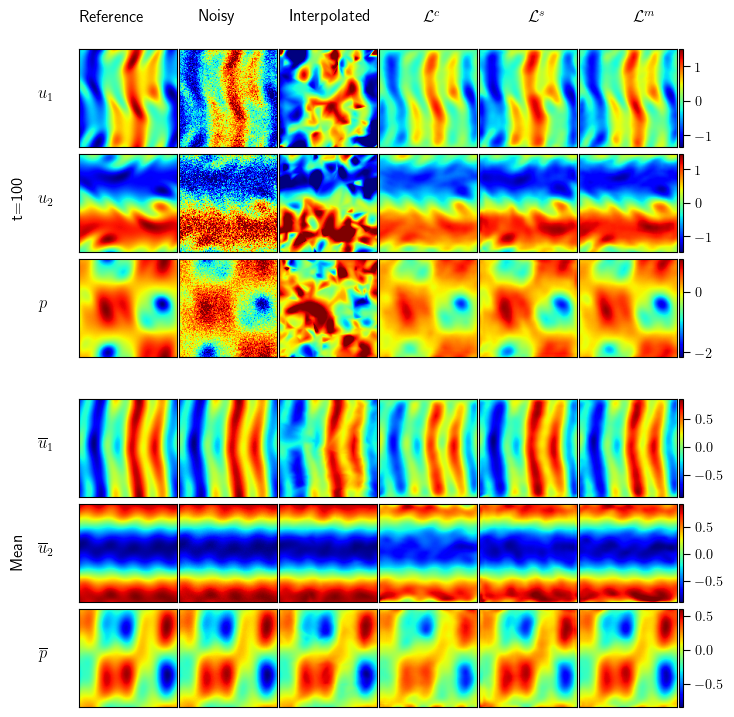

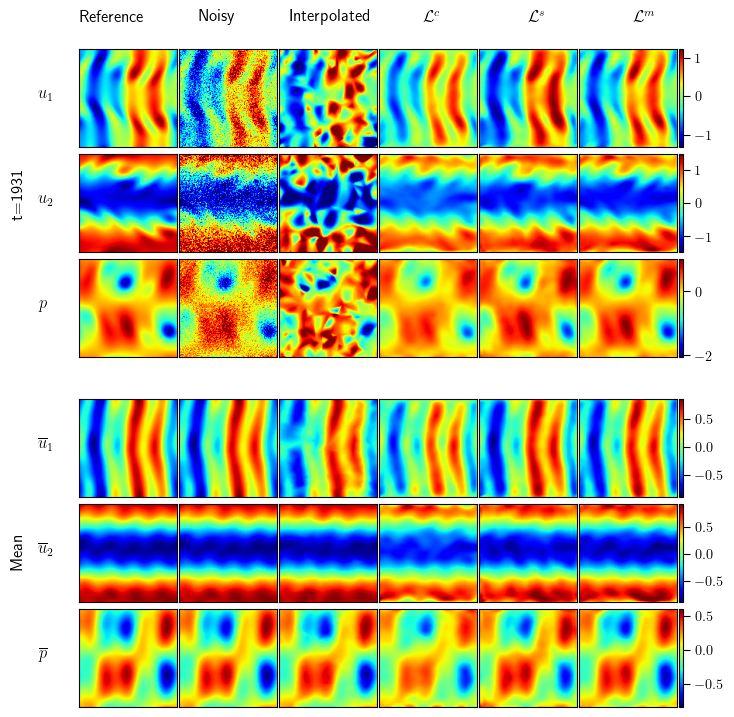

In [16]:
make_image_snapshots(results5,None,100)
make_image_snapshots(results5,None,1931)

In [18]:
relative_error(results5[-1],results5[0])

0.24849941